In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [6]:

def discretize0(obs, pos_grid, vel_grid):
    obs0 = obs[0]
    pos = obs0[0]
    vel = obs0[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)

def discretize(obs, pos_grid, vel_grid):
    pos = obs[0]
    vel = obs[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)
def bestMove(Q_vals, s, a_list):
    values = np.array([Q_vals[s,a] for a in a_list])
    action = np.argmax(values)

    return action
    


In [5]:

env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
n_games = 50000
alpha = 0.1
gamma = 0.9
epsilon = 1
actions = [0, 1, 2]


states = list()
for pos in range(15):
    for vel in range(20):
        states.append((pos,vel))
Q_values = {}
for s in states:
    for a in actions:
        Q_values[s, a] = 0


score = 0
total_rewards = np.zeros(n_games)
for i in range(n_games):
    done = False
    obs = env.reset()
    s = discretize0(obs, pos_grid, vel_grid)
    if i % 100 == 0 and i > 0:
        print('episode ', i, 'score ', score, 'epsilon %.3f' % epsilon)
    score = 0
    while not done:
        a = np.random.choice([0,1,2]) if np.random.random() < epsilon \
                else bestMove(Q_values, s, actions)
        obs_, reward, done, info, dic = env.step(a)
        s_ = discretize(obs_, pos_grid, vel_grid)
        score += reward
        a_ = bestMove(Q_values, s_, actions)
        Q_values[s, a] = Q_values[s, a] + \
                alpha*(reward + gamma*Q_values[s_, a_] - Q_values[s, a])
        s = s_
    total_rewards[i] = score
    epsilon = epsilon - 2/n_games if epsilon > 0.01 else 0.01


episode  100 score  -33757.0 epsilon 0.996
episode  200 score  -39143.0 epsilon 0.992
episode  300 score  -16181.0 epsilon 0.988
episode  400 score  -49043.0 epsilon 0.984
episode  500 score  -36066.0 epsilon 0.980
episode  600 score  -12638.0 epsilon 0.976
episode  700 score  -18601.0 epsilon 0.972
episode  800 score  -7447.0 epsilon 0.968
episode  900 score  -38361.0 epsilon 0.964
episode  1000 score  -10583.0 epsilon 0.960
episode  1100 score  -8334.0 epsilon 0.956
episode  1200 score  -18909.0 epsilon 0.952
episode  1300 score  -6024.0 epsilon 0.948
episode  1400 score  -13112.0 epsilon 0.944
episode  1500 score  -7194.0 epsilon 0.940
episode  1600 score  -11943.0 epsilon 0.936
episode  1700 score  -3115.0 epsilon 0.932
episode  1800 score  -19194.0 epsilon 0.928
episode  1900 score  -7335.0 epsilon 0.924
episode  2000 score  -9000.0 epsilon 0.920
episode  2100 score  -571.0 epsilon 0.916
episode  2200 score  -9212.0 epsilon 0.912
episode  2300 score  -2831.0 epsilon 0.908
episode 

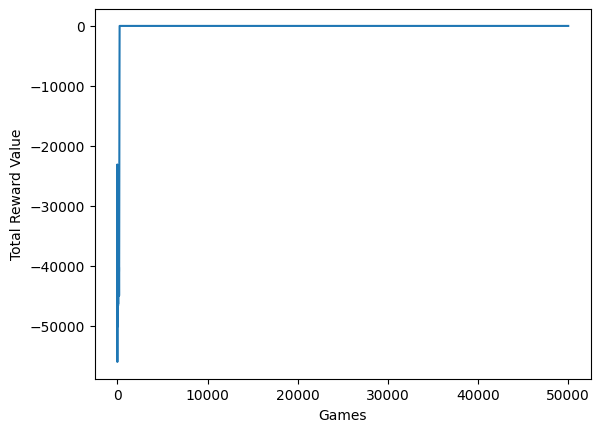

In [ ]:

mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
plt.plot(mean_rewards)
plt.xlabel("Games")
plt.ylabel("Total Reward Value")
plt.savefig('mountaincar.png')
